# Excercise 5
## Neural Networks in Keras and Pytorch 🔥

Use keras framework to solve the below exercises.


In [ ]:
#pip install tensorflow matplotlib
#pip install numpy matplotlib tensorflow scikit-learn
!pip install livelossplot

In [1]:
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.nn import relu, softmax
from tensorflow.keras.regularizers import l1_l2, l2
from tensorflow.keras.layers import BatchNormalization, Dropout
from livelossplot import PlotLossesKeras
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

# 5 Moons Dataset

**Exercise:** Use keras and pytorch framework to find a decision boundary for point in the make_moons.

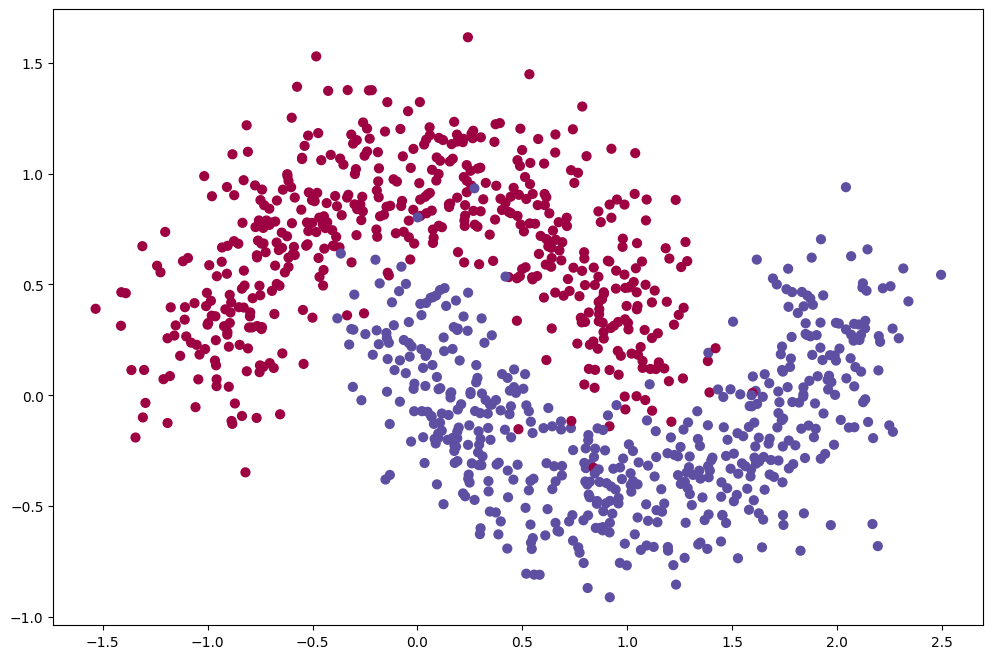

In [3]:
# Create moons dataset.

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral);

# 5.1 Decision Boundary -- Keras

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

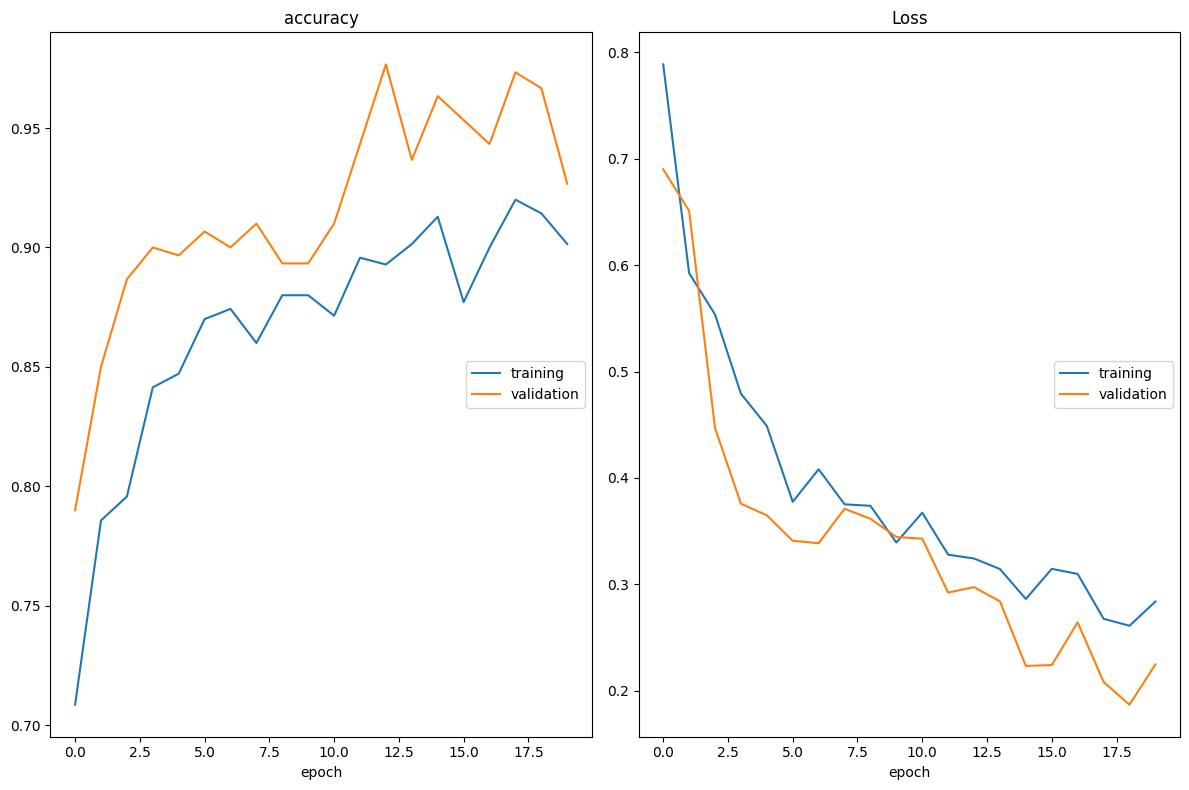

accuracy
	training         	 (min:    0.709, max:    0.920, cur:    0.901)
	validation       	 (min:    0.790, max:    0.977, cur:    0.927)
Loss
	training         	 (min:    0.261, max:    0.789, cur:    0.284)
	validation       	 (min:    0.187, max:    0.690, cur:    0.225)
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.8947 - loss: 0.3095 - val_accuracy: 0.9267 - val_loss: 0.2249


In [4]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Crear el modelo
model = Sequential()
model.add(Dense(10, input_dim=2, activation=relu, kernel_initializer='he_normal', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(7, activation=relu, kernel_initializer='he_normal', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(5, activation=relu, kernel_initializer='he_normal', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(
    x_train, y_train,
    validation_data=[x_test, y_test],
    epochs=20, batch_size=32, verbose=1,
    callbacks=[PlotLossesKeras()])


**Hint:** Use the next function to plt the decision boundary,

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

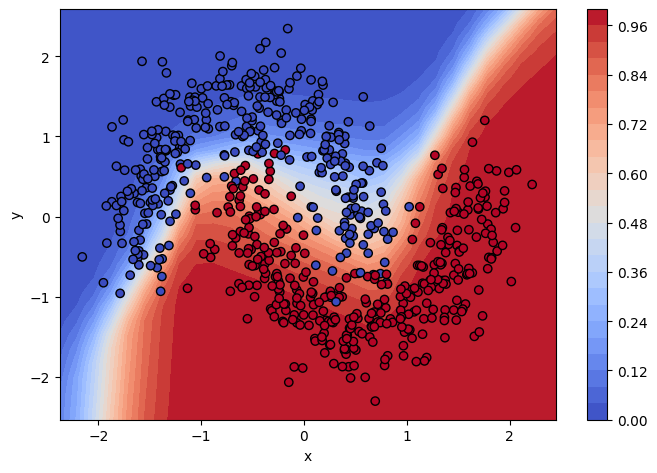

In [5]:
#model = 'Sequential neural network in keras'

def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap = plt.cm.coolwarm, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")

def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

def plot_data(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

plt.figure(figsize = (8,16/3))
'''
Here 'model' is the neural network you previous trained.
'''
plot_decision_region(model, x_train, pred_fun)
plot_data(x_train, y_train)
plt.show()

# 5.2 Decision Boundary -- PyTorch 🔥

**Exercise:** Use PyTorch to find a decision boundary for point in the make_moons.

In [6]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

class Model(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(Model, self).__init__()
        self.input_layer    = nn.Linear(input_dim,128)
        self.hidden_layer1  = nn.Linear(128,64)
        self.output_layer   = nn.Linear(64,output_dim)
        self.relu = nn.ReLU()

    def forward(self,x):
        out =  self.relu(self.input_layer(x))
        out =  self.relu(self.hidden_layer1(out))
        out =  self.output_layer(out)
        return out

input_dim  = 2
output_dim = 2
model = Model(input_dim,output_dim)

learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

def train_model(model,optimizer,criterion,X_train,y_train,X_test,y_test,num_epochs,train_losses,test_losses):
    for epoch in range(num_epochs):
        #clear out the gradients from the last step loss.backward()
        optimizer.zero_grad()

        #forward feed
        output_train = model(X_train)

        #calculate the loss
        loss_train = criterion(output_train, y_train)

        #backward propagation: calculate gradients
        loss_train.backward()

        #update the weights
        optimizer.step()

        output_test = model(X_test)
        loss_test = criterion(output_test,y_test)

        train_losses[epoch] = loss_train.item()
        test_losses[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

num_epochs = 1000
train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [7]:
train_model(model,optimizer,criterion,x_train,y_train,x_test,y_test,num_epochs,train_losses,test_losses)

Epoch 50/1000, Train Loss: 0.0569, Test Loss: 0.0693
Epoch 100/1000, Train Loss: 0.0498, Test Loss: 0.0689
Epoch 150/1000, Train Loss: 0.0462, Test Loss: 0.0748
Epoch 200/1000, Train Loss: 0.0431, Test Loss: 0.0755
Epoch 250/1000, Train Loss: 0.0414, Test Loss: 0.0873
Epoch 300/1000, Train Loss: 0.0371, Test Loss: 0.0918
Epoch 350/1000, Train Loss: 0.0352, Test Loss: 0.0987
Epoch 400/1000, Train Loss: 0.0349, Test Loss: 0.1148
Epoch 450/1000, Train Loss: 0.0369, Test Loss: 0.0876
Epoch 500/1000, Train Loss: 0.0279, Test Loss: 0.1133
Epoch 550/1000, Train Loss: 0.0257, Test Loss: 0.1271
Epoch 600/1000, Train Loss: 0.0276, Test Loss: 0.1440
Epoch 650/1000, Train Loss: 0.0255, Test Loss: 0.1563
Epoch 700/1000, Train Loss: 0.0208, Test Loss: 0.1667
Epoch 750/1000, Train Loss: 0.0193, Test Loss: 0.1738
Epoch 800/1000, Train Loss: 0.0177, Test Loss: 0.1805
Epoch 850/1000, Train Loss: 0.0204, Test Loss: 0.2086
Epoch 900/1000, Train Loss: 0.0153, Test Loss: 0.2288
Epoch 950/1000, Train Loss: 0

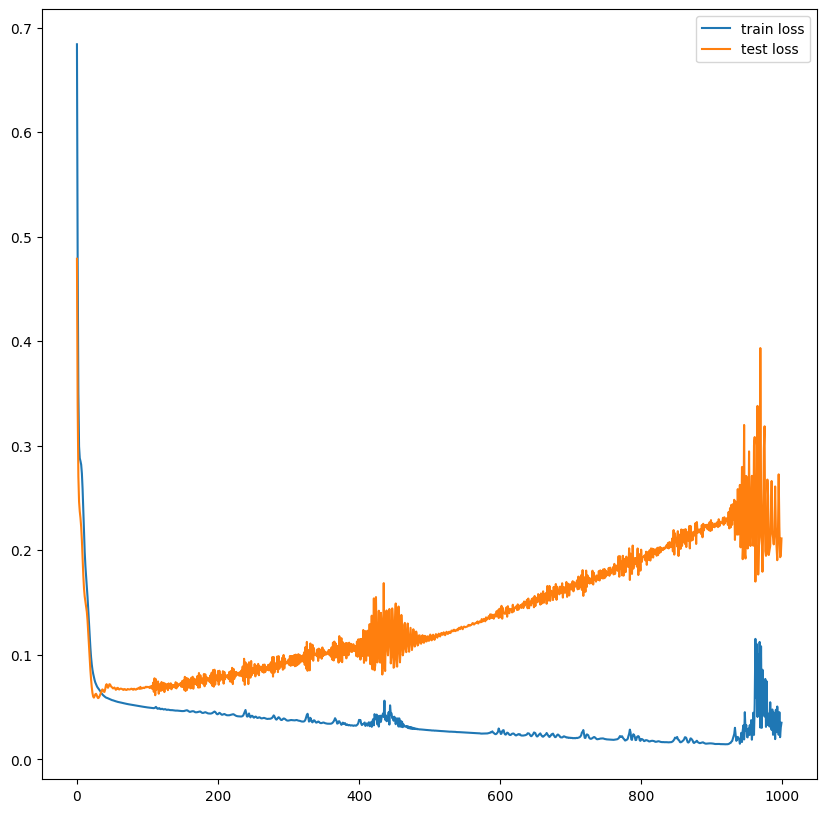

In [8]:
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [9]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(x_train)
    predictions_test = model(x_test)

In [10]:
def accuracy_multiclass(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []

    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0

    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

train_acc = accuracy_multiclass(predictions_train,y_train)
test_acc  = accuracy_multiclass(predictions_test,y_test)

print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 99.286
Test Accuracy: 97.333


**Hint:** Use the next function to plt the decision boundary,

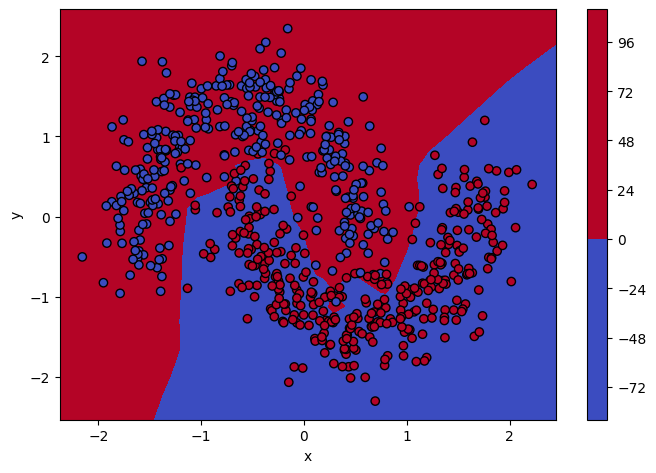

In [11]:
#model = 'Sequential neural network in PyTorch'

def plot_decision_region(model, X, pred_fun):

    if isinstance(X, torch.Tensor):
        X = X.numpy()
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap = plt.cm.coolwarm, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")

def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    with torch.no_grad():
        xval = torch.tensor([[x1, x2]], dtype=torch.float)
        output = model(xval)
        return output.numpy()[0, 0]

def plot_data(X, y):
    # Convert X and y to numpy arrays if they are tensors
    if isinstance(X, torch.Tensor):
        X = X.numpy()
    if isinstance(y, torch.Tensor):
        y = y.numpy()
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')

plt.figure(figsize = (8,16/3))
'''
Here 'model' is the neural network you previous trained.
'''
plot_decision_region(model, x_train, pred_fun)
plot_data(x_train, y_train)
#plt.show()